# Processing

In [ ]:
import pandas as pd
import numpy as np

rppa_sheets = pd.read_excel('/workspaces/HOCMO/package_demo/MDD_RPPA_Level3_preprocessed_2020-9.xlsx', sheet_name=None)
rppa_sheet = rppa_sheets['MDD_RPPA_Level3_annotated'].set_index('Protein')
rppa_sheet.columns = [c.split('_')[0]+'_'+c.split('_')[1] for c in rppa_sheet.columns]
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]

rppa_averaged= rppa_averaged[['Ctrl_4', 'Ctrl_8', 'Ctrl_24', 'Ctrl_48', 
               'EGF_4', 'EGF_8', 'EGF_24', 'EGF_48',
               'HGF_4', 'HGF_8', 'HGF_24', 'HGF_48', 
               'OSM_4', 'OSM_8','OSM_24', 'OSM_48', 
               'BMP2_4','BMP2_8', 'BMP2_24', 'BMP2_48', 
               'IFNG_4', 'IFNG_8', 'IFNG_24','IFNG_48', 
               'TGFB_4', 'TGFB_8', 'TGFB_24', 'TGFB_48'
               ]]

time_conditions=['_4','_8','_24','_48']

for time_condition in time_conditions:
    time_m=rppa_averaged.columns.str.endswith(time_condition)
    conditions=rppa_averaged.columns[time_m&(~rppa_averaged.columns.str.contains('Ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        rppa_averaged[condition] = rppa_averaged[condition]-rppa_averaged['Ctrl'+time_condition]
    rppa_averaged=rppa_averaged.drop('Ctrl'+time_condition,axis=1)
rppa_averaged = np.absolute(rppa_averaged)

In [ ]:
gcp_sheet = pd.read_excel('/workspaces/HOCMO/package_demo/LINCS_GCP_Plate72_annotated_minimized_2019-12-16_16-53-04_LVL3_preprocessed.xlsx', sheet_name='LINCS_GCP_Plate72')

gcp_sheet_T = gcp_sheet.set_index('histone').T
gcp_sheet_T.index.name = gcp_sheet_T.columns.name
gcp_sheet_T.columns.name = None
gcp_averaged = gcp_sheet_T.groupby(gcp_sheet_T.columns, axis=1, sort=False).mean()
time_conditions=['_4','_8','_24','_48']
for time_condition in time_conditions:
    time_m=gcp_averaged.columns.str.endswith(time_condition)
    conditions=gcp_averaged.columns[time_m&(~gcp_averaged.columns.str.contains('ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        gcp_averaged[condition] = gcp_averaged[condition]-gcp_averaged['ctrl_0']
gcp_averaged = gcp_averaged.drop('ctrl_0',axis=1)

In [ ]:
gcp_averaged

In [ ]:
rppa_averaged

In [ ]:
rppa_averaged.to_csv("RPPA_test.csv")
gcp_averaged.to_csv("GCP_test.csv")

# Function calls for HOCMO

In [1]:
from hocmo import hocmo

In [2]:
incidence_matrix,incidence_matrix_binary,protein_names,ligand_names,condition_names,tensor = hocmo.createTensor('/workspaces/HOCMO/package_demo/RPPA_test.csv','Protein',6,4)
incidence_matrix1,incidence_matrix_binary1,histone_names,ligand_names1,condition_names1,tensor1 = hocmo.createTensor('/workspaces/HOCMO/package_demo/GCP_test.csv','histone',6,4)

Size of the tensor: (4, 295, 6)
Size of the tensor: (4, 63, 6)


tensor size: (295, 6, 4)


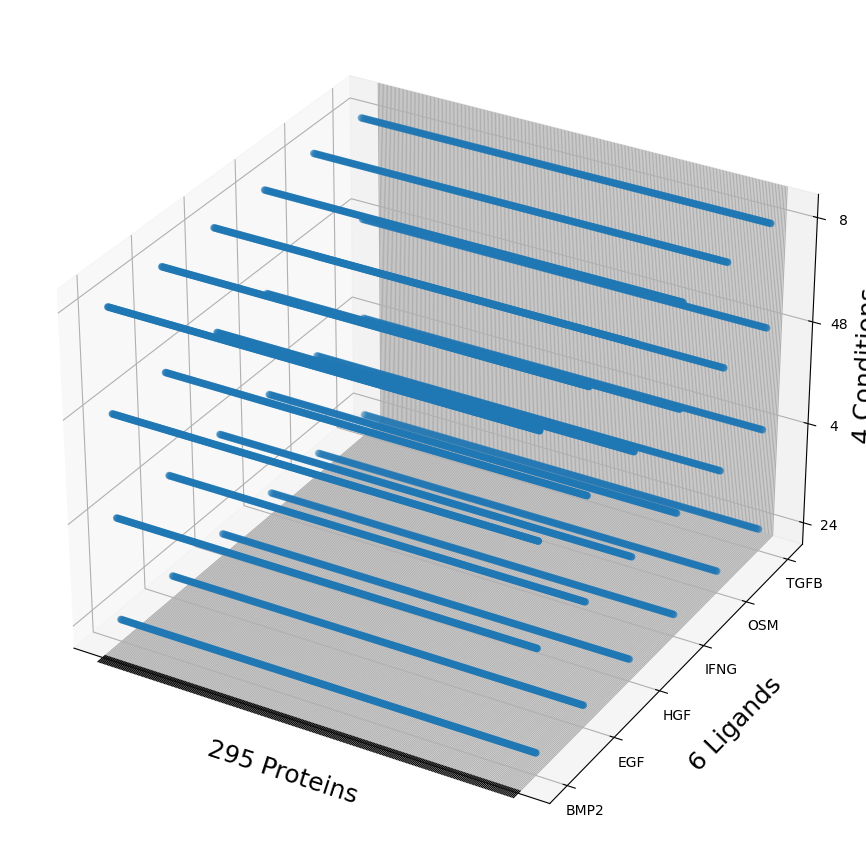

tensor size: (63, 6, 4)


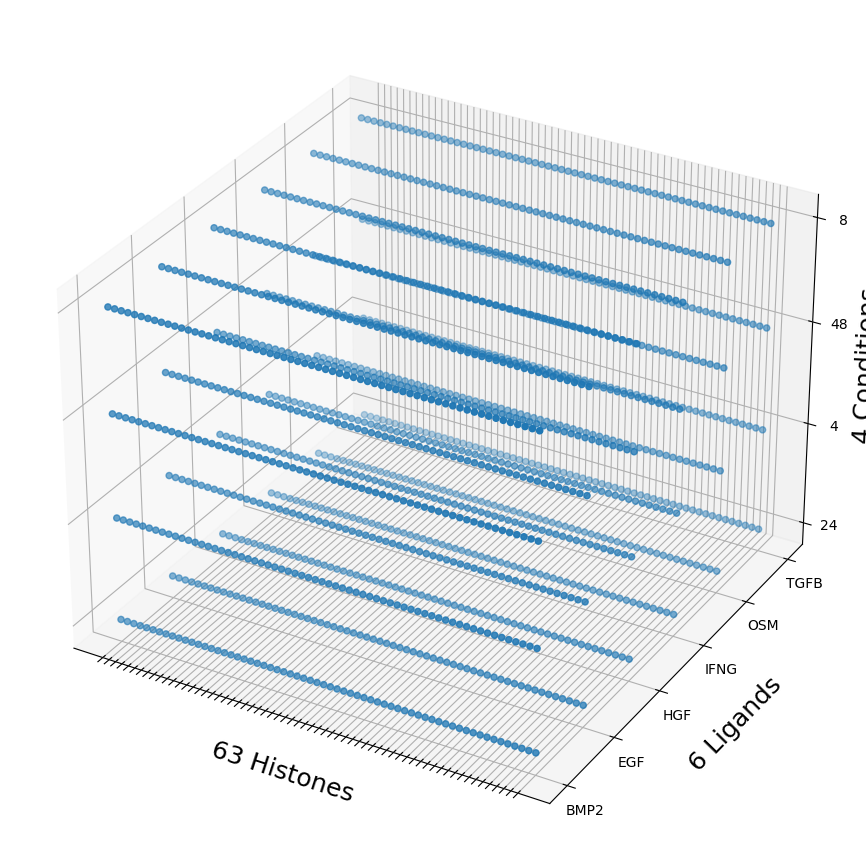

array([[[0.01603694, 0.00498128, 0.15020102, 0.11987436],
        [0.22310623, 0.00518862, 0.00451462, 0.08667783],
        [0.38609183, 0.02431607, 0.01223472, 0.00463541],
        [1.28004885, 0.05647008, 1.00454291, 0.15170223],
        [0.07312222, 0.24783035, 0.32408214, 0.09314978],
        [0.73523688, 0.0348537 , 0.0886167 , 0.27071722]],

       [[0.13363067, 0.13617883, 0.25985261, 0.16643383],
        [0.28110924, 0.10246243, 0.19855576, 0.11193881],
        [0.51355998, 0.07417823, 0.0328451 , 0.10798136],
        [1.37583075, 0.01695011, 1.06683495, 0.14408483],
        [0.06744267, 0.07217349, 0.38547037, 0.05503942],
        [0.63584072, 0.17820431, 0.07058933, 0.10703157]],

       [[0.25379935, 0.06700125, 0.41653408, 0.14575866],
        [0.27353731, 0.14247286, 0.03674173, 0.28082664],
        [0.0686377 , 0.06177913, 0.06135844, 0.21847132],
        [1.11076422, 0.17267652, 0.94383461, 0.28305081],
        [0.1520419 , 0.26863546, 0.61928438, 0.07883695],
        [0

In [3]:
hocmo.basicVisual(tensor, 'Proteins', 'Ligands', 'Conditions', protein_names,ligand_names,condition_names, './data/','test.png')
hocmo.basicVisual(tensor1, 'Histones', 'Ligands', 'Conditions', histone_names,ligand_names1,condition_names1, './data/','test1.png')

In [ ]:
components = hocmo.getCoreConsistency(tensor, "./data/core_consistency_rppa.png", iters = 100, num_k = 11, start =2, top_k=20)
components1 = hocmo.getCoreConsistency(tensor1, "./data/core_consistency_gcp.png", iters = 100, num_k = 11, start =2, top_k=20)


In [4]:
components = 2
A,B,C = hocmo.factorize(tensor, components, method="ncp")
A1,B1,C1 = hocmo.factorize(tensor1, components, method="ncp")

[A,B,C]: (295, 2) (6, 2) (4, 2)
[A,B,C]: (63, 2) (6, 2) (4, 2)


In [5]:
component_preds_A, component_preds_B, component_preds_C = hocmo.componentPredictionsForFactors(A,B,C)
component_preds_A1, component_preds_B1, component_preds_C1 = hocmo.componentPredictionsForFactors(A1,B1,C1)

295 inputs in total, each input belongs to a predicted component with the largest membership value:

 [1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1]
6 inputs in total, each input belongs to a predicted component with the largest membership value:

 [0 0 0 0 0 0]
6 inputs in total, each input belongs to a predicted component with the largest membership value:

 [0 0 0 0 0 0]
63 inputs in total, each input belongs to a predicted component with th

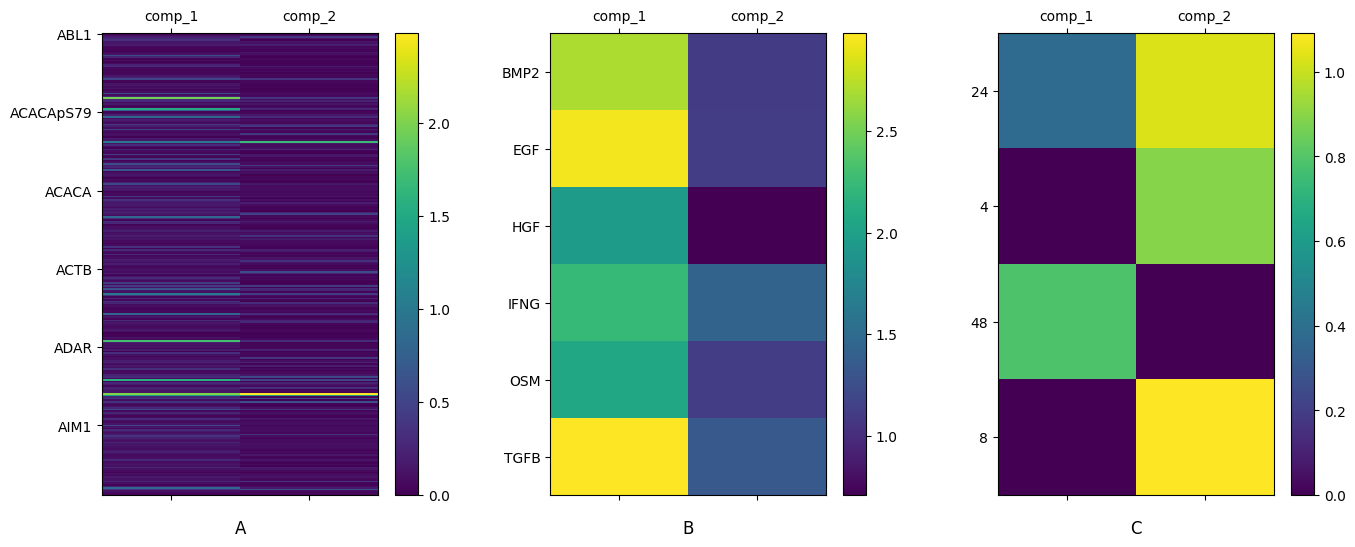

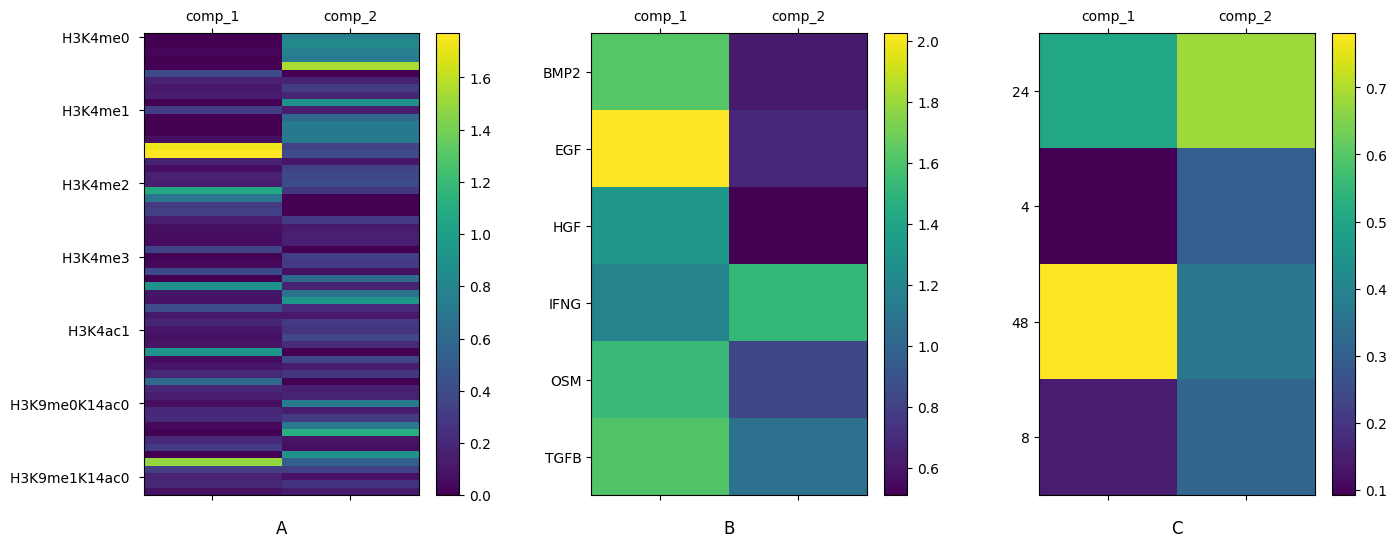

In [6]:
hocmo.plotFactorMatrices(A, B, C, components, './data/A_rppa.png', './data/B_rppa.png', './data/C_rppa.png', protein_names,ligand_names,condition_names)
hocmo.plotFactorMatrices(A1, B1, C1, components, './data/A_gcp.png', './data/B_gcp.png', './data/C_gcp.png', histone_names,ligand_names1,condition_names1)

['0~214', '215~294']
(6, 295, 4)
['0~21', '22~62']
(6, 63, 4)


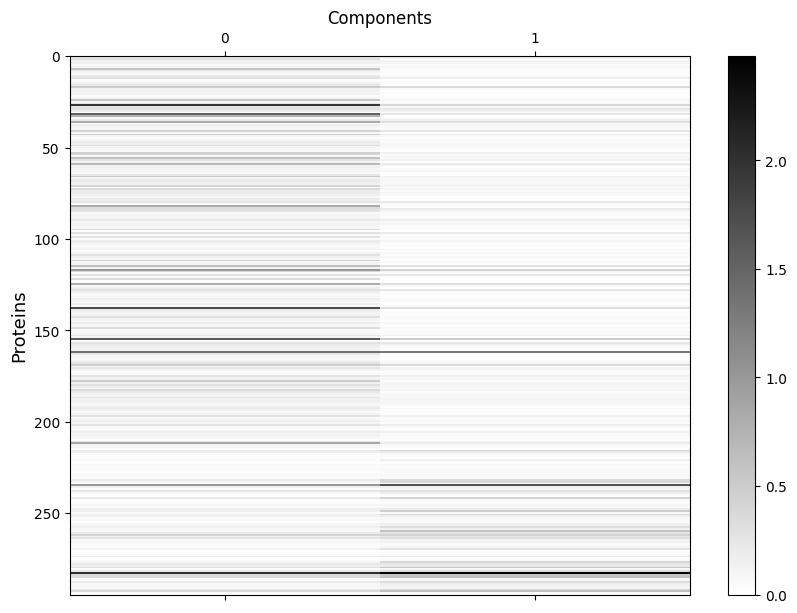

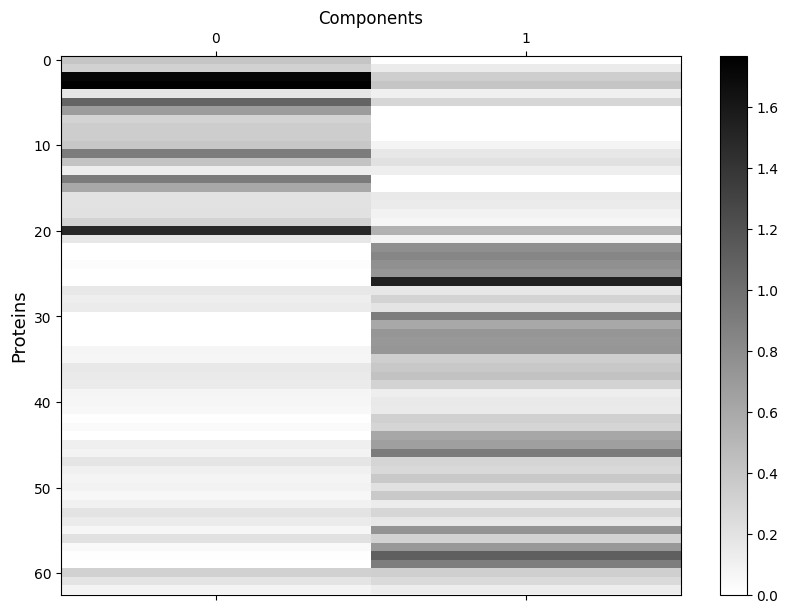

In [7]:
tensor_binary, A_ranked, A_names_ranked, A_clusters = hocmo.getClusterMembershipProbabilityA(A, 6,4, components, component_preds_A,  incidence_matrix_binary, incidence_matrix,
                                                        'Proteins', 'RPPA', "./data/A_ranked_per_cluster.png", )

tensor_binary1, A_ranked1, A_names_ranked1, A_clusters1 = hocmo.getClusterMembershipProbabilityA(A1, 6,4, components, component_preds_A1,  incidence_matrix_binary1, incidence_matrix1,
                                                        'Proteins', 'GCP', "./data/A_ranked_per_cluster.png", )


['0~5', '6~5']
['0~4', '5~5']


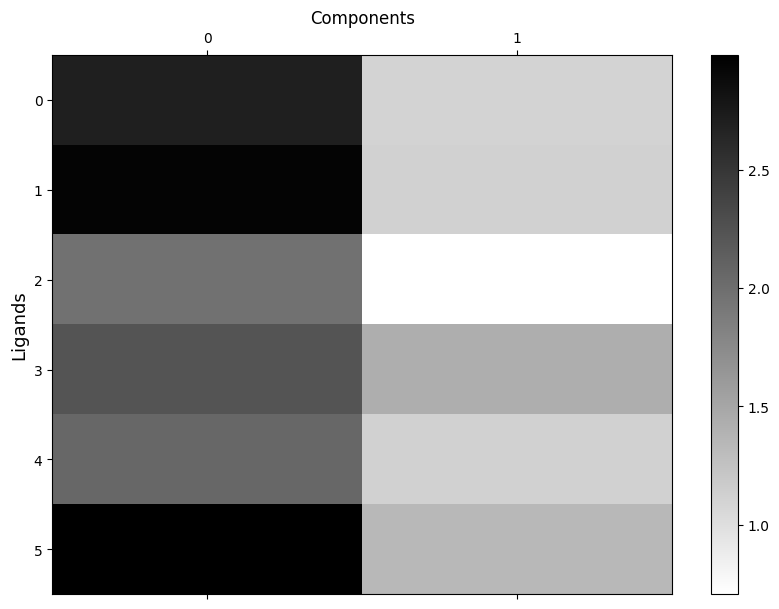

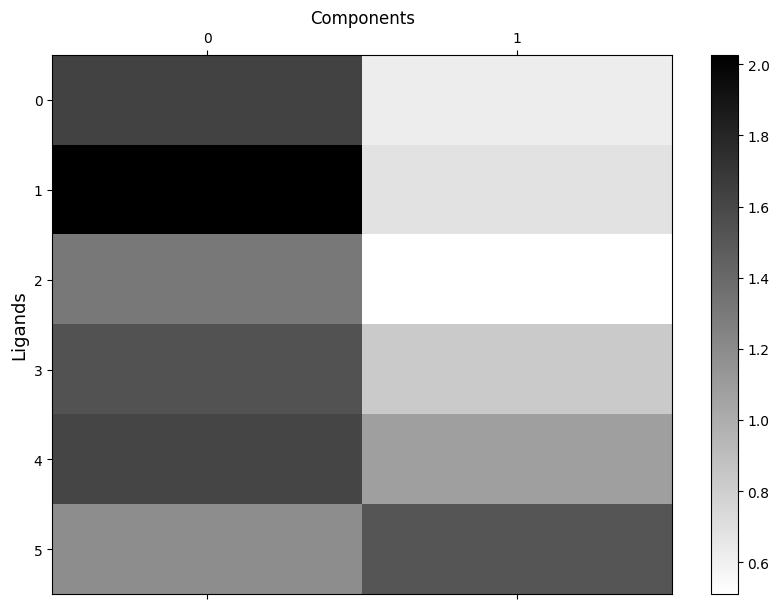

In [8]:
B_ranked, B_names_ranked, B_clusters = hocmo.getClusterMembershipProbability(B, components, component_preds_B, ligand_names, 'Ligands','Components', "./data/B_ranked_per_cluster.png")

B_ranked1, B_names_ranked1, B_clusters1 = hocmo.getClusterMembershipProbability(B1, components, component_preds_B1, ligand_names1, 'Ligands','Components', "./data/B1_ranked_per_cluster.png")


['0~0', '1~3']
['0~0', '1~3']


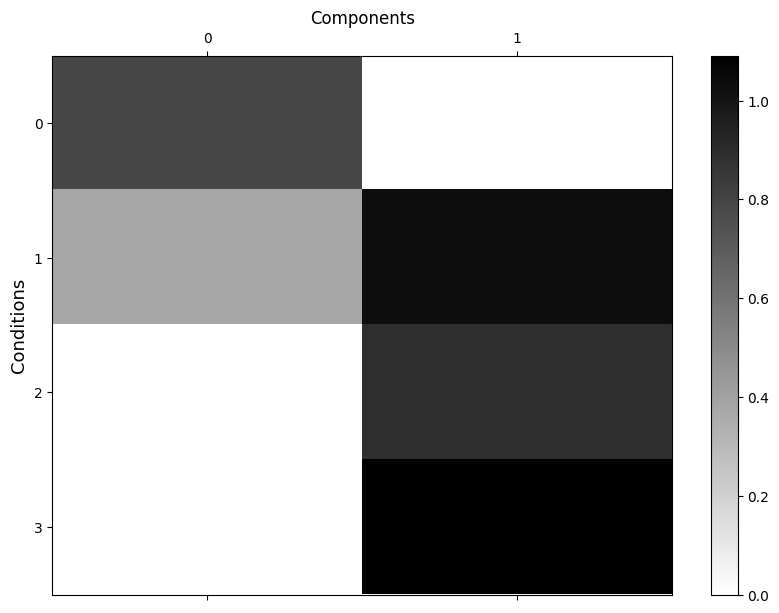

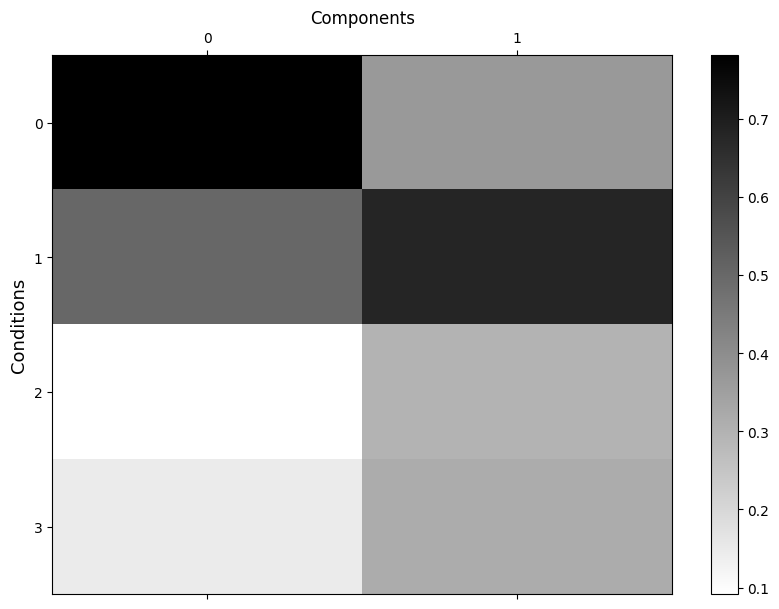

In [9]:
C_ranked, C_names_ranked, C_clusters = hocmo.getClusterMembershipProbability(C, components, component_preds_C, condition_names, 'Conditions','Components', "./data/C_ranked_per_cluster.png")

C_ranked1, C_names_ranked1, C_clusters1 = hocmo.getClusterMembershipProbability(C1, components, component_preds_C1, condition_names1, 'Conditions','Components', "./data/C_ranked_per_cluster1.png")


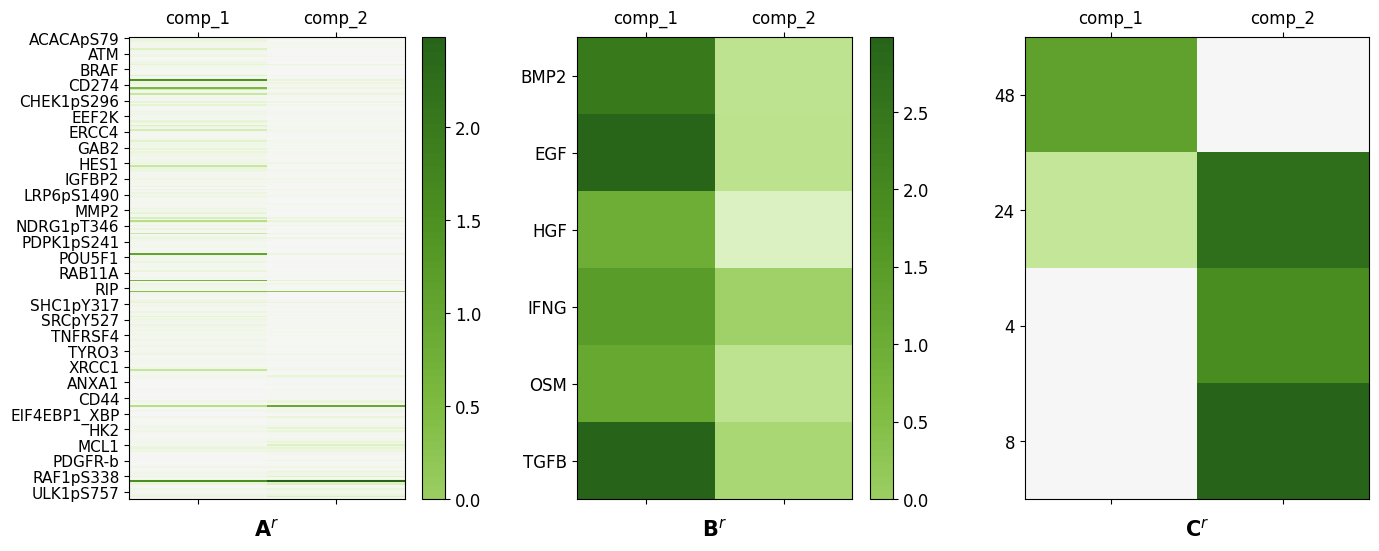

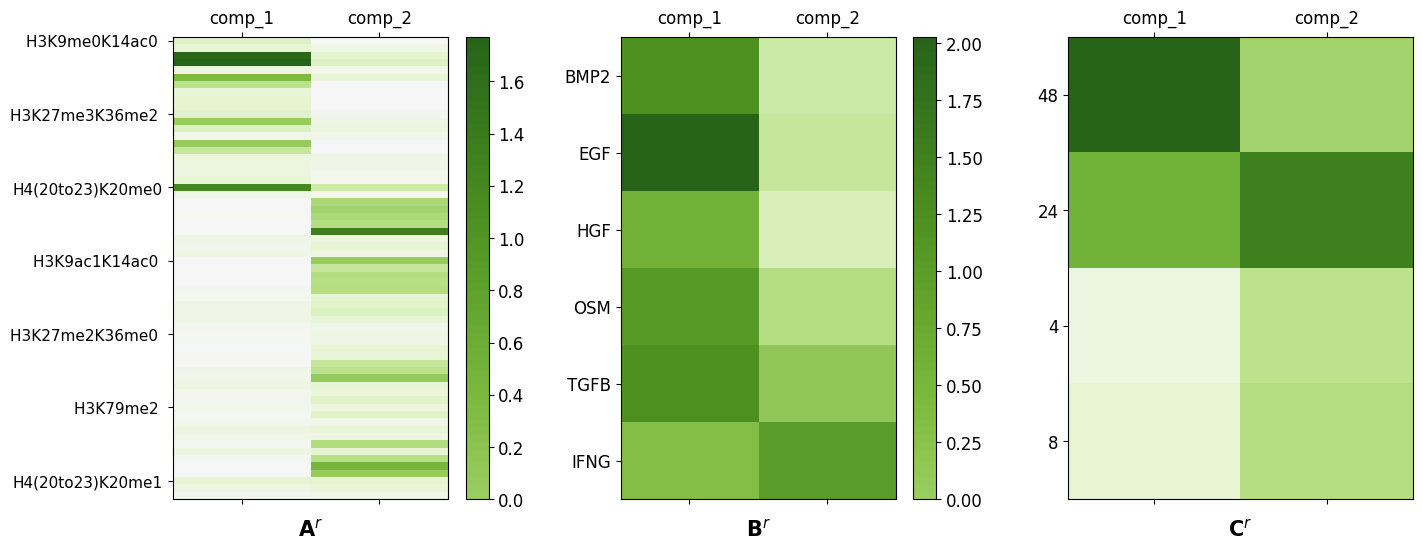

In [10]:
hocmo.plotLatentFactor(A_ranked, B_ranked, C_ranked, components, A_names_ranked, B_names_ranked, C_names_ranked, './data/')
hocmo.plotLatentFactor(A_ranked1, B_ranked1, C_ranked1, components, A_names_ranked1, B_names_ranked1, C_names_ranked1, './data/')

In [11]:
hocmo.saveFactorsToExcel(A_ranked, B_ranked, C_ranked, components, A_names_ranked, B_names_ranked, C_names_ranked, './data/', "latentFactors_gcp.xlsx")
hocmo.saveFactorsToExcel(A_ranked1, B_ranked1, C_ranked1, components, A_names_ranked1, B_names_ranked1, C_names_ranked1, './data/', "latentFactors.xlsx")

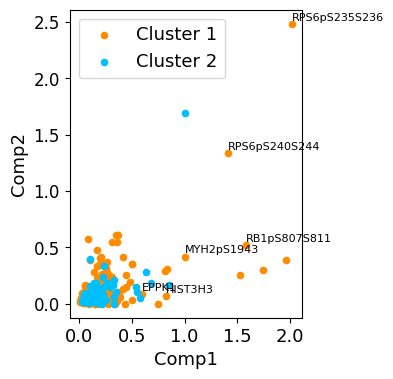

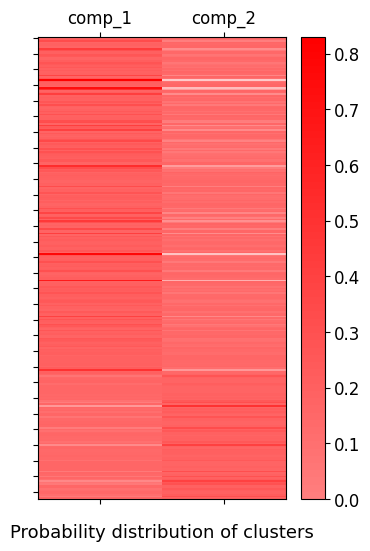

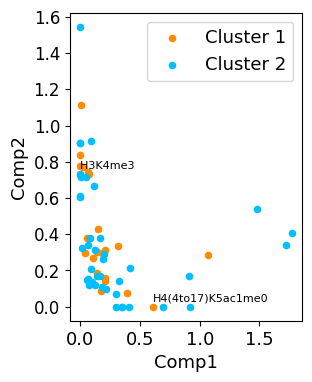

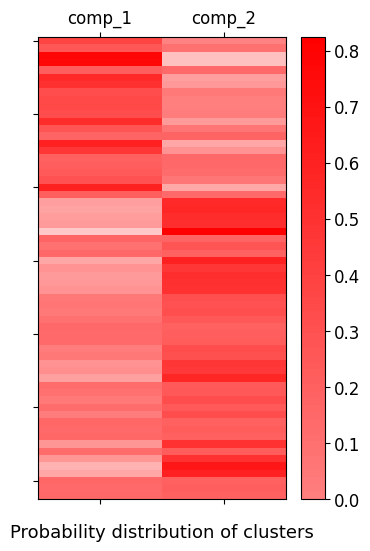

In [12]:
hocmo.plotForFactorMatrix(A_ranked, A_clusters, A_names_ranked, components,"proteins_per_cluster_scatter_plot.png", './data/' ,"proteins_per_cluster_probability.png")
hocmo.plotForFactorMatrix(A_ranked1, A_clusters1, A_names_ranked1, components,"proteins_per_cluster_scatter_plot.png", './data/' ,"proteins_per_cluster_probability_gcp.png")

(295, 6)


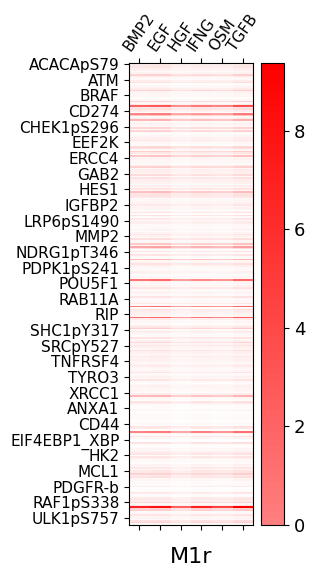

mean:0.6493460797209939, std:0.8664402456113409


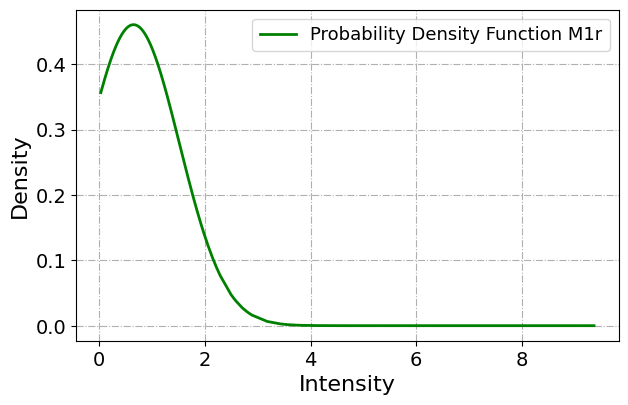

(295, 4)


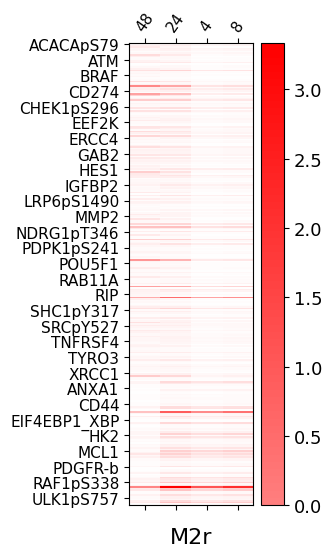

mean:0.15306789865247256, std:0.24023138061549576


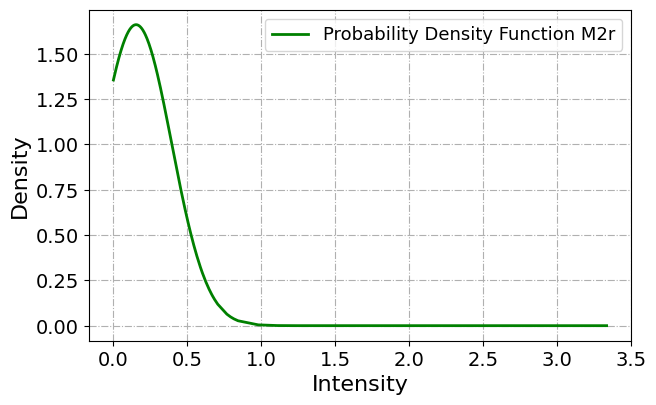

(6, 4)


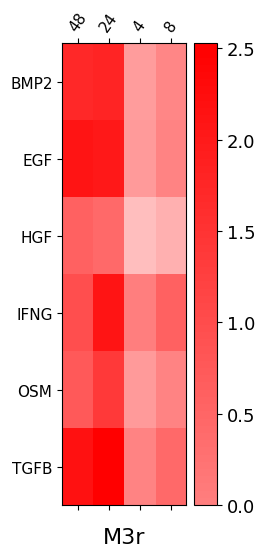

mean:1.5826027250990957, std:0.5440604884499692


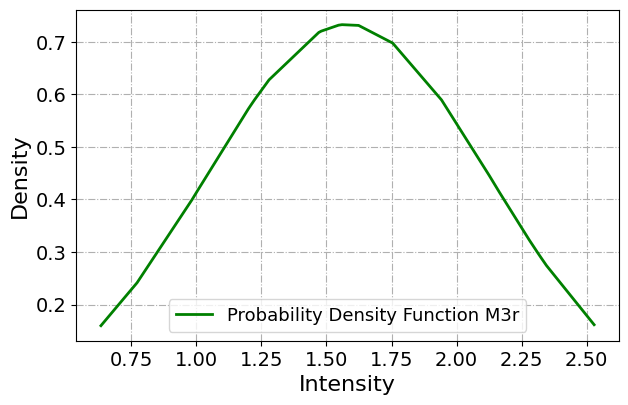

(63, 6)


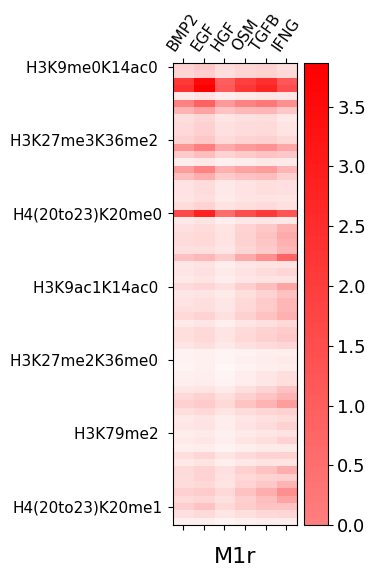

mean:0.7280712243298855, std:0.619967193989944


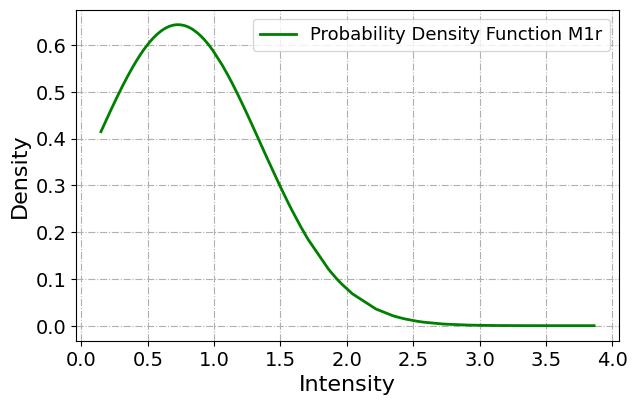

(63, 4)


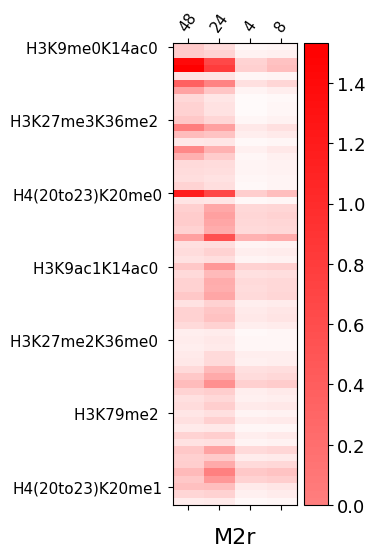

mean:0.2530513864943939, std:0.2319633468225562


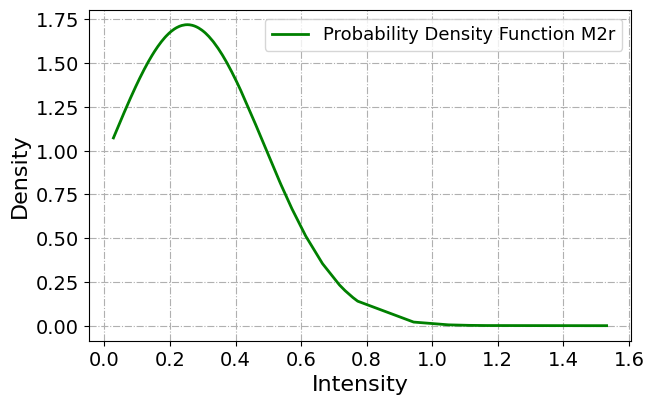

(6, 4)


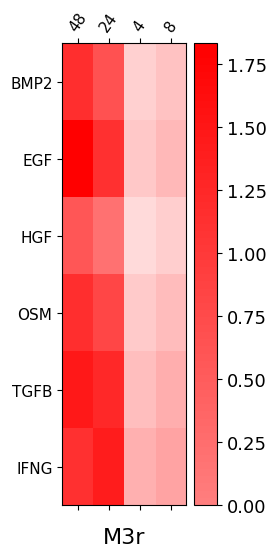

mean:0.9525562339675423, std:0.5275029837386759


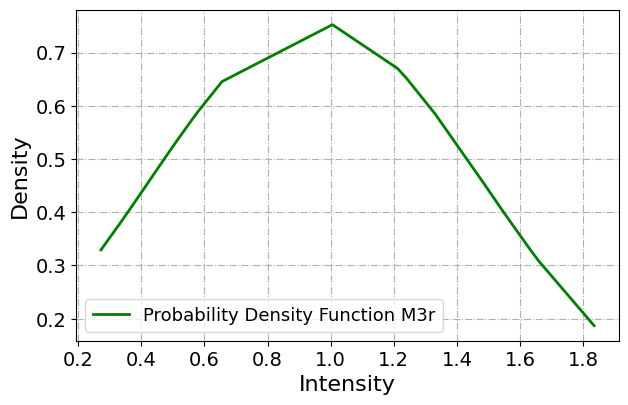

In [13]:
patterns_list, means_list, std_list = hocmo.getCorrelationsForAllFactors(A_ranked, B_ranked, C_ranked, A_names_ranked, B_names_ranked, C_names_ranked,'./data/', "Intensity_density_ncp_rppa.xlsx", './data/', [ "M1r", "M2r", "M3r"],
                                        ['Probability Density Function M1r', 'Probability Density Function M2r','Probability Density Function M3r'])
patterns_list1, means_list1, std_list1 = hocmo.getCorrelationsForAllFactors(A_ranked1, B_ranked1, C_ranked1, A_names_ranked1, B_names_ranked1, C_names_ranked1,'./data/', "Intensity_density_ncp_gcp.xlsx", './data/', [ "M1r", "M2r", "M3r"],
                                        ['Probability Density Function M1r', 'Probability Density Function M2r','Probability Density Function M3r'])

In [14]:
patterns_AB = patterns_list[0]
patterns_AC = patterns_list[1]
patterns_BC = patterns_list[2]
mean_AB = means_list[0]
mean_AC = means_list[1]
mean_BC = means_list[2]
std_AB = std_list[0]
std_AC = std_list[1]
std_BC = std_list[2]

patterns_AB1 = patterns_list1[0]
patterns_AC1 = patterns_list1[1]
patterns_BC1 = patterns_list1[2]
mean_AB1 = means_list1[0]
mean_AC1 = means_list1[1]
mean_BC1 = means_list1[2]
std_AB1 = std_list1[0]
std_AC1 = std_list1[1]
std_BC1 = std_list1[2]

<Figure size 1600x1000 with 0 Axes>

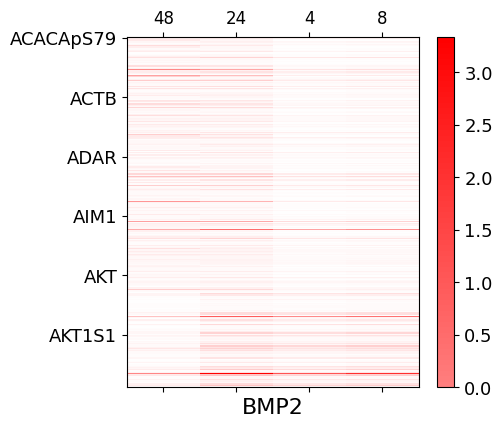

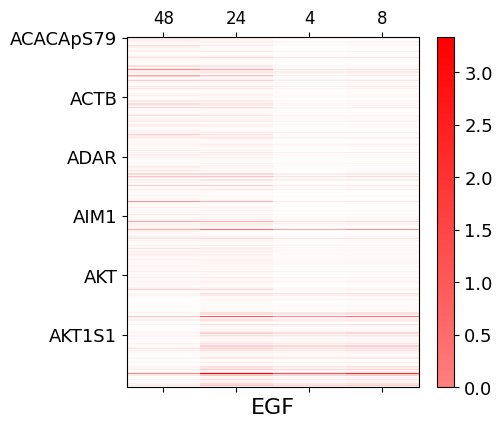

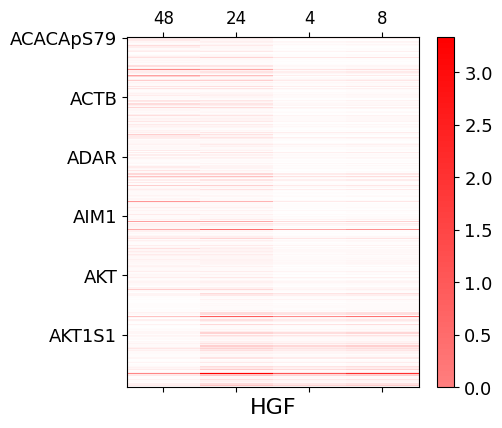

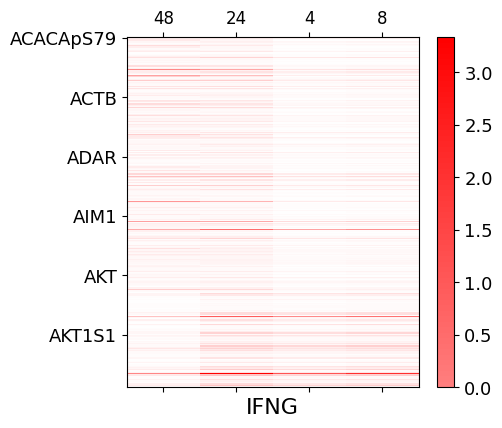

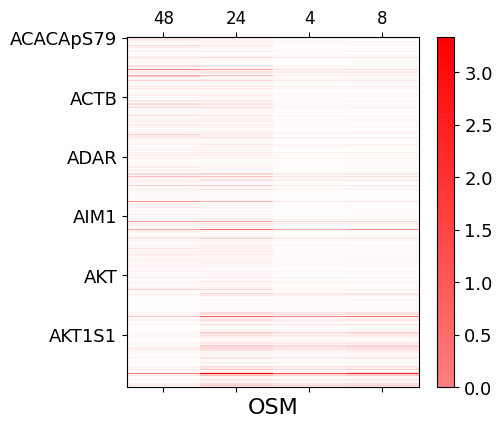

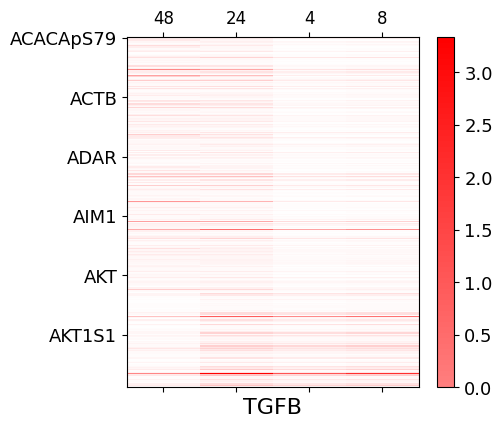

BMP2, mean:0.15306789865247256, std:0.24023138061549576


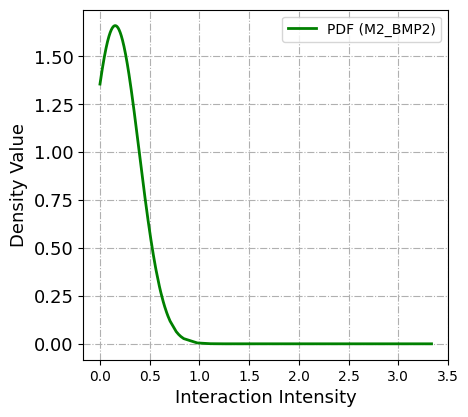

EGF, mean:0.15306789865247256, std:0.24023138061549576


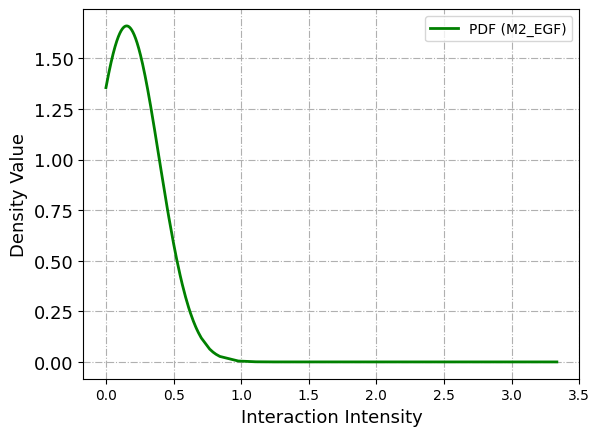

HGF, mean:0.15306789865247256, std:0.24023138061549576


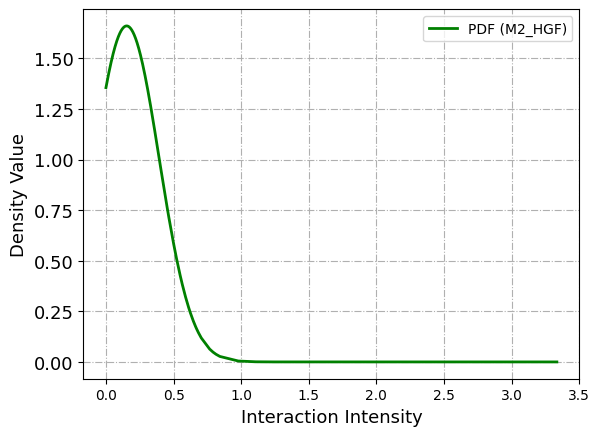

IFNG, mean:0.15306789865247256, std:0.24023138061549576


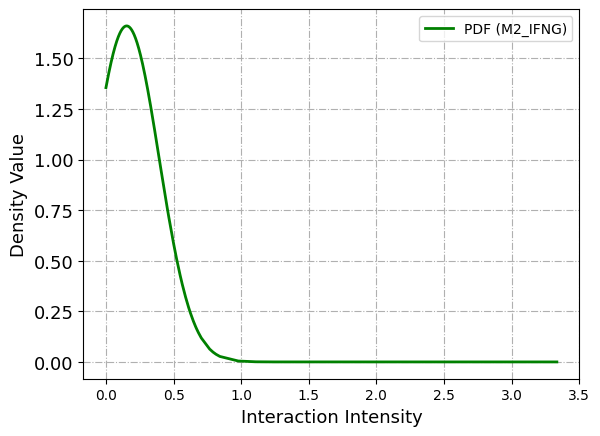

OSM, mean:0.15306789865247256, std:0.24023138061549576


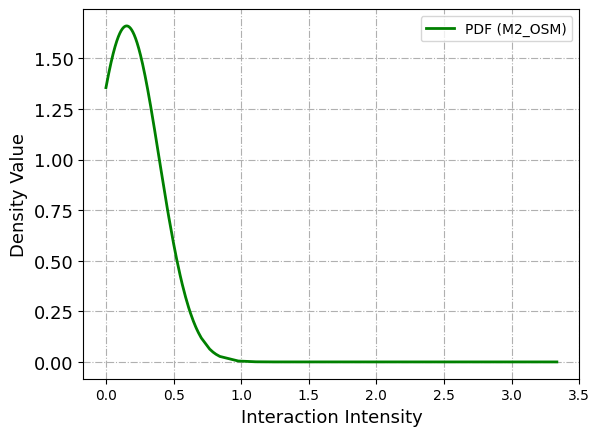

TGFB, mean:0.15306789865247256, std:0.24023138061549576


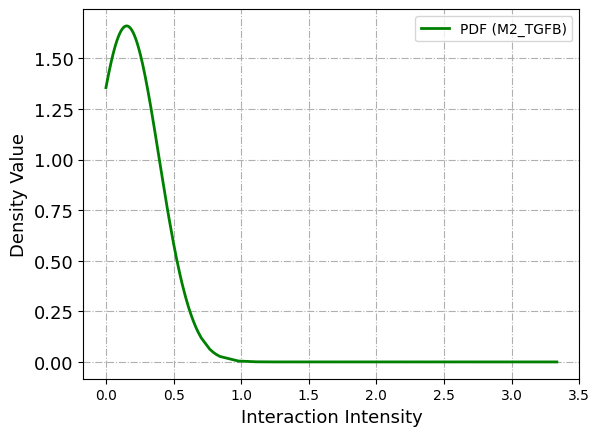

<Figure size 1600x1000 with 0 Axes>

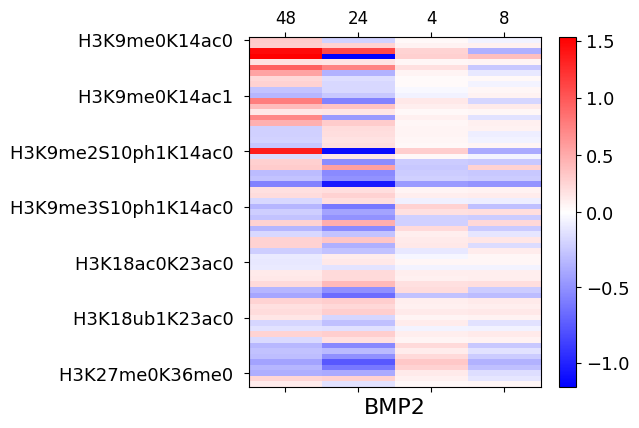

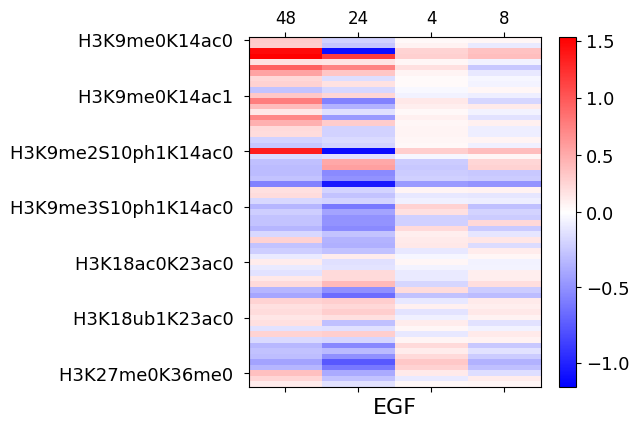

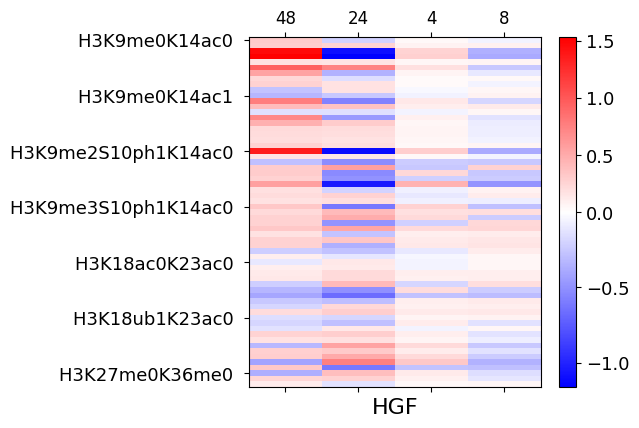

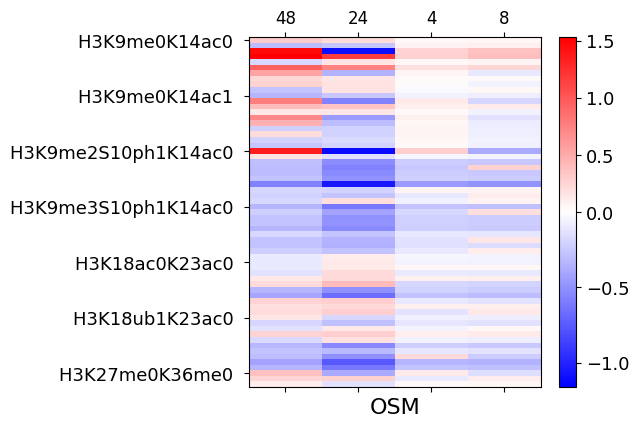

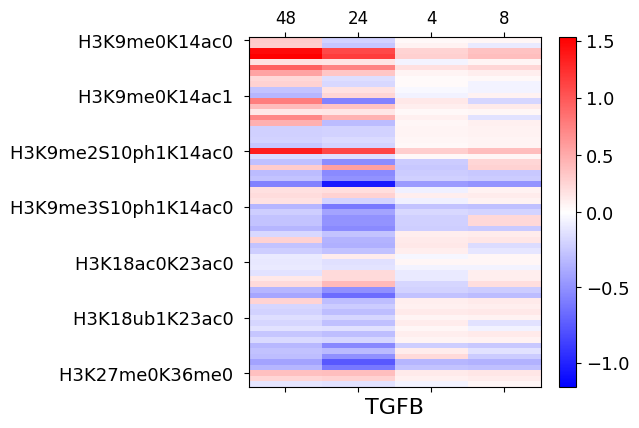

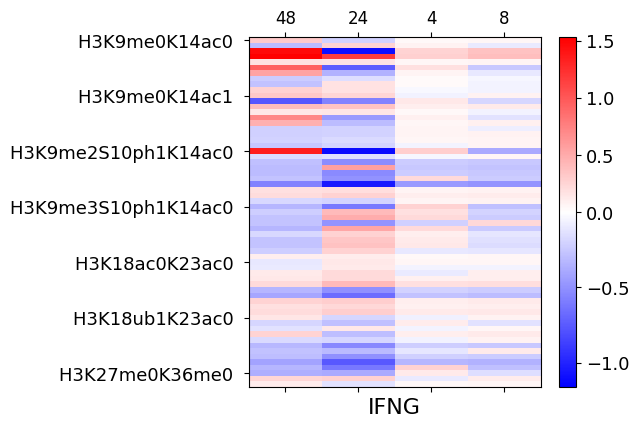

BMP2, mean:-0.002995040071976319, std:0.34326815787489506


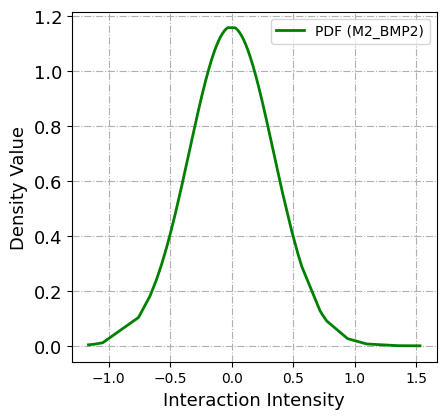

EGF, mean:-0.023463172417421112, std:0.3424784343808629


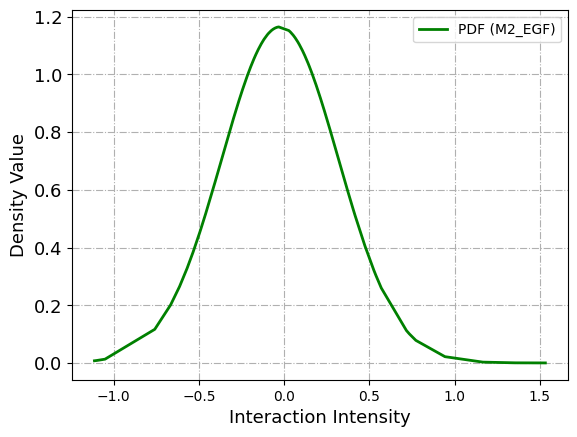

HGF, mean:0.04497670471906551, std:0.34032204528721116


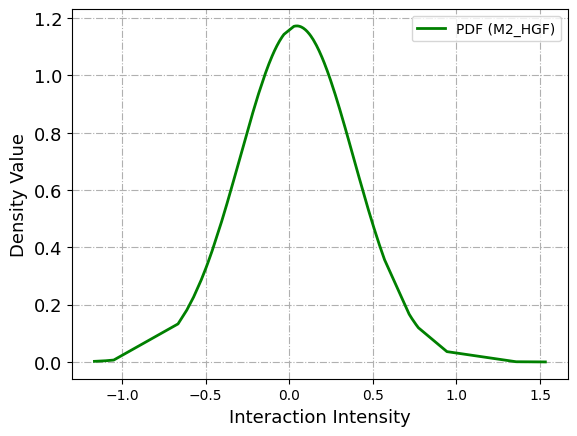

OSM, mean:-0.06231747200294583, std:0.3375774446834662


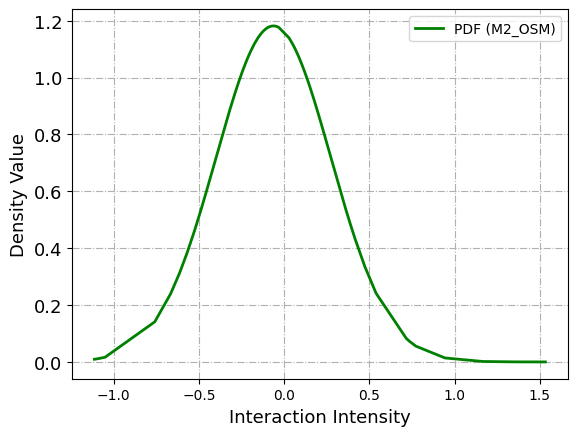

TGFB, mean:-0.015967482135720454, std:0.3429096644746282


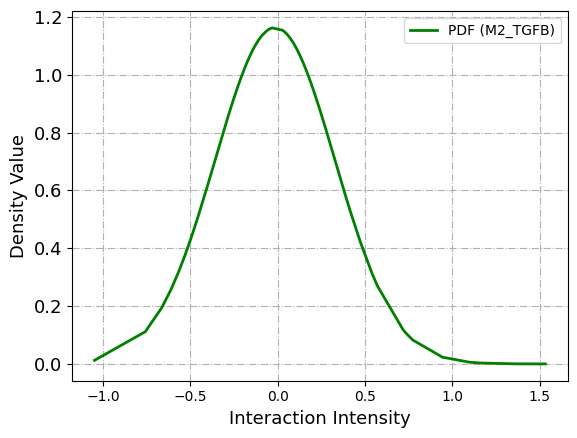

IFNG, mean:-0.028043101172813417, std:0.34213386700598347


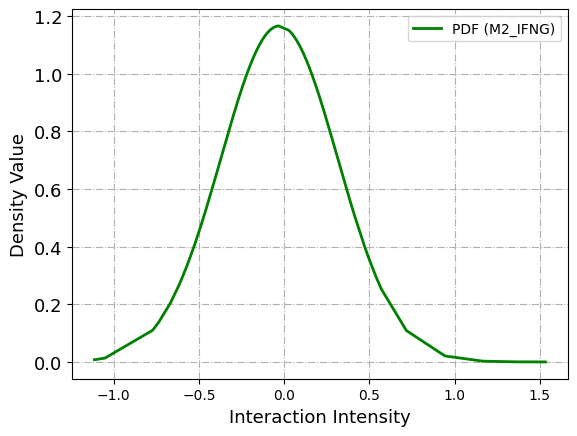

In [15]:
hocmo.plotCorrelationsPerEntity(patterns_AC, tensor_binary, A_names_ranked, B_names_ranked, C_names_ranked, "./data/", "./data/")

hocmo.plotCorrelationsPerEntity(patterns_AC1, tensor_binary1, A_names_ranked1, B_names_ranked1, C_names_ranked1, "./data/", "./data/")


In [16]:
patterns_AB_pairs, patterns_AC_pairs, patterns_BC_pairs = hocmo.writeCorrelationsToExcel(patterns_list, ["M1_AB", "M2_AC", "M3_BC"], './data/correlations.xlsx', A_names_ranked, B_names_ranked, C_names_ranked)

patterns_AB_pairs1, patterns_AC_pairs1, patterns_BC_pairs1 = hocmo.writeCorrelationsToExcel(patterns_list1, ["M1_AB", "M2_AC", "M3_BC"], './data/correlations_gcp.xlsx', A_names_ranked1, B_names_ranked1, C_names_ranked1)

In [17]:
'''

'''

M1_cutoff_ce = 2.890480549 - mean_AB
M2_cutoff_ce = 0.70486722 - mean_AC
M3_cutoff_ce= 2.31192068 - mean_BC

M1_cutoff_ce1 = 1.493671157 - mean_AB1
M2_cutoff_ce1 = 0.478510333 - mean_AC1
M3_cutoff_ce1 = 1.473261366 - mean_BC1


cutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]
cutoffs_center_elbow_list1 = [M1_cutoff_ce1, M2_cutoff_ce1, M3_cutoff_ce1]


M1_cutoff_e = 2.890480549 - mean_AB
M2_cutoff_e = 0.70486722 - mean_BC
M3_cutoff_e= 2.31192068 - mean_BC

M1_cutoff_e1 = 2.042120144 - mean_AB1
M2_cutoff_e1 = 0.71890227 - mean_AC1
M3_cutoff_e1 = 1.547860473 - mean_BC1


cutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]
cutoffs_elbow_list1 = [M1_cutoff_e1, M2_cutoff_e1, M3_cutoff_e1]


M1_cutoff_asymptotic = 4.137811156 - mean_AB
M2_cutoff_asymptotic = 1.110098385 - mean_AC
M3_cutoff_asymptotic=  2.342765763 - mean_BC

M1_cutoff_asymptotic1 = 2.974741259 - mean_AB1
M2_cutoff_asymptotic1 = 1.072320865 - mean_AC1
M3_cutoff_asymptotic1 = 1.659471139 - mean_BC1

cutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]
cutoffs_asymptotic_list1 = [M1_cutoff_asymptotic1, M2_cutoff_asymptotic1, M3_cutoff_asymptotic1]


'''
M1_cutoff_ce = 0
M2_cutoff_ce = 0
M3_cutoff_ce= 0
cutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]
M1_cutoff_e = 0
M2_cutoff_e = 0
M3_cutoff_e= 0
cutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]
M1_cutoff_asymptotic = 0
M2_cutoff_asymptotic = 0
M3_cutoff_asymptotic=  0
cutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]
'''

'\nM1_cutoff_ce = 0\nM2_cutoff_ce = 0\nM3_cutoff_ce= 0\ncutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]\nM1_cutoff_e = 0\nM2_cutoff_e = 0\nM3_cutoff_e= 0\ncutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]\nM1_cutoff_asymptotic = 0\nM2_cutoff_asymptotic = 0\nM3_cutoff_asymptotic=  0\ncutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]\n'

In [18]:
hocmo.getSignificantEntities([patterns_AB_pairs, patterns_AC_pairs, patterns_BC_pairs], cutoffs_elbow_list, cutoffs_center_elbow_list, cutoffs_asymptotic_list, [mean_AB, mean_AC, mean_BC], ["M1_Elbow", "M2_Elbow", "M3_Elbow"], ["M1_Center_Elbow", "M2_Center_Elbow", "M3_Center_Elbow"], ["M1_Asymptotic", "M2_Asymptotic", "M3_Asymptotic"], './data/SignificantEntities.xlsx')
hocmo.getSignificantEntities([patterns_AB_pairs1, patterns_AC_pairs1, patterns_BC_pairs1], cutoffs_elbow_list1, cutoffs_center_elbow_list1, cutoffs_asymptotic_list1, [mean_AB1, mean_AC1, mean_BC1], ["M1_Elbow", "M2_Elbow", "M3_Elbow"], ["M1_Center_Elbow", "M2_Center_Elbow", "M3_Center_Elbow"], ["M1_Asymptotic", "M2_Asymptotic", "M3_Asymptotic"], './data/SignificantEntities_gcp.xlsx')


(295, 63)
mean:2.880501396728006, std:5.358964019410603


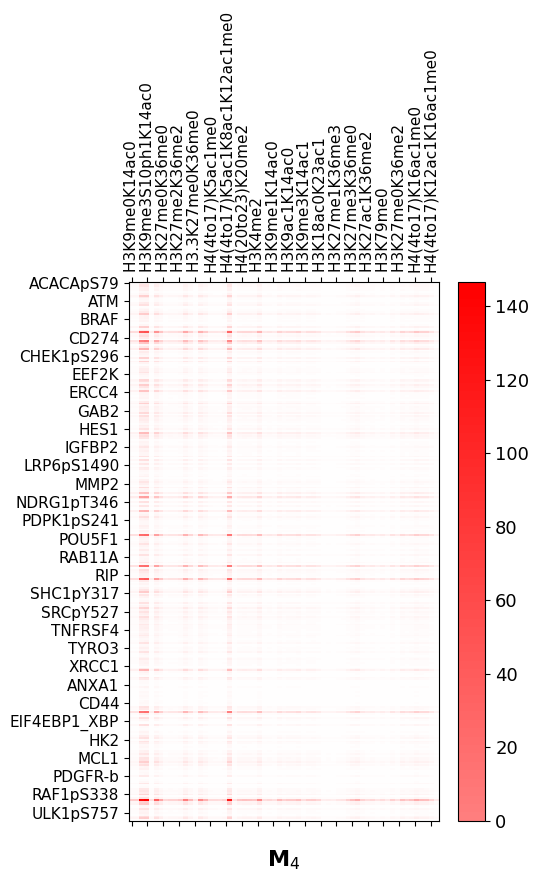

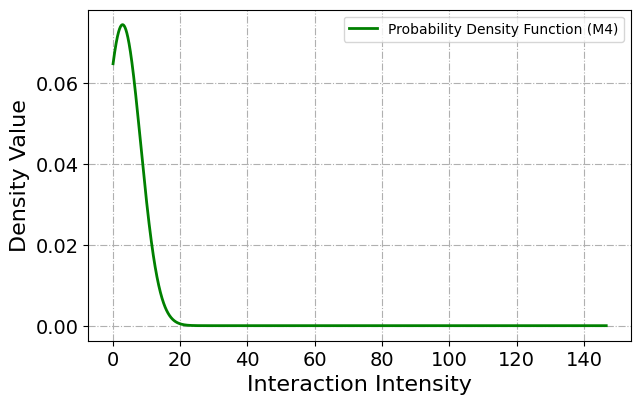

In [19]:
patterns_rppa_gcp = hocmo.crossVisualize(patterns_AB1, patterns_AB, A_names_ranked, A_names_ranked1, "data/M4_with_Intensity_dist_ncp.xlsx")


In [20]:
total_hoc_score = hocmo.getAllHOCScores(patterns_AB, patterns_rppa_gcp, A_names_ranked, A_names_ranked1, B_names_ranked,"data/HOC_scores.xlsx")
total_hoc_score

,Triplet,HOC Score
1168,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , TGFB>",1373.487894
873,"<RPS6pS235S236, H3K9me2S10ph1K14ac0 , TGFB>",1315.461941
1168,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , EGF>",1278.982073
6183,"<RPS6pS235S236, H4(20to23)K20me0, TGFB>",1230.069327
873,"<RPS6pS235S236, H3K9me2S10ph1K14ac0 , EGF>",1224.948721
...,...,...
15611,"<PIK3CA, H3K27me0K36me3 , HGF>",0.002064
18561,"<PIK3CA, H4(68-78)AltNorm, HGF>",0.001815
12071,"<PIK3CA, H3K27me2K36me0 , HGF>",0.001789
11776,"<PIK3CA, H3K27me1K36me3 , HGF>",0.001625


In [21]:
hocmo.getAllHOCScores(patterns_AB, patterns_AC, A_names_ranked, C_names_ranked, B_names_ranked,"data/HOC_scores.xlsx")

,Triplet,HOC Score
578,"<RPS6pS235S236, 24, TGFB>",31.229491
578,"<RPS6pS235S236, 24, EGF>",29.080678
578,"<RPS6pS235S236, 24, BMP2>",27.286014
578,"<RPS6pS235S236, 24, IFNG>",26.848087
1168,"<RPS6pS235S236, 8, TGFB>",25.389925
...,...,...
893,"<ARID1A, 8, HGF>",0.000000
946,"<ERCC5, 8, EGF>",0.000000
712,"<NF2, 4, OSM>",0.000000
887,"<ADAR, 8, BMP2>",0.000000


In [22]:
sig_ligands = B_names_ranked
sig_proteins = ['CCNB1','PLK1','RB1pS807S811','RPS6pS240S244','DUSP4','RPS6pS235S236',
                'CDC2','MYH2pS1943']
sig_histones = ['H3K9me2S10ph1K14ac0 ','H3K9me3S10ph1K14ac0 ','H3K18ub1K23ac0 ']

total_hoc_score = hocmo.getFilteredHOCScores(patterns_AB, patterns_rppa_gcp, A_names_ranked, A_names_ranked1, B_names_ranked,sig_proteins, sig_histones, "data/filtered_HOC_scores.xlsx")


total_hoc_score

,Triplet,HOC Score
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , EGF>",1.000000
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , BMP2>",1.000000
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , HGF>",1.000000
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , IFNG>",1.000000
13,"<RPS6pS235S236, H3K9me3S10ph1K14ac0 , OSM>",1.000000
...,...,...
23,"<MYH2pS1943, H3K18ub1K23ac0 , EGF>",0.091562
23,"<MYH2pS1943, H3K18ub1K23ac0 , BMP2>",0.090475
23,"<MYH2pS1943, H3K18ub1K23ac0 , TGFB>",0.088657
23,"<MYH2pS1943, H3K18ub1K23ac0 , OSM>",0.085377
